In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.spatial.distance import pdist, squareform
from skimage.transform import resize

from sklearn import metrics, preprocessing
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Reshape
from tensorflow.keras.layers import Embedding, Conv1D, GlobalAveragePooling1D, MaxPooling1D
from tensorflow.keras.utils import to_categorical


In [23]:
import scipy.io
import pandas as pd
import numpy as np


In [24]:
df_final = pd.read_csv(r"C:\Users\kriti\Downloads\df_final_dataset_last.csv")


In [25]:
print(df_final.head())

   label       Ch1       Ch2
0      0  0.276211  0.508278
1      0  0.021195  0.100154
2      0  0.276211  0.151170
3      0 -0.386831  0.125662
4      0  0.225208 -0.154923


In [26]:
print(df_final.head())

   label       Ch1       Ch2
0      0  0.276211  0.508278
1      0  0.021195  0.100154
2      0  0.276211  0.151170
3      0 -0.386831  0.125662
4      0  0.225208 -0.154923


In [27]:
df_final = df_final.sort_values(by='label').reset_index(drop=True)
print(df_final.head())

   label       Ch1       Ch2
0      0  0.429221  0.049139
1      0  0.021195  0.227693
2      0  0.072198  0.202185
3      0  0.505726  0.635817
4      0  0.225208 -0.052892


In [28]:
label = df_final['label']
df_v1 = df_final[['Ch1', 'Ch2']]
df_final.head()

,label,Ch1,Ch2
0,0,0.429221,0.049139
1,0,0.021195,0.227693
2,0,0.072198,0.202185
3,0,0.505726,0.635817
4,0,0.225208,-0.052892


In [ ]:
import numpy as np
from scipy import stats

def create_segments_and_labels(df, time_steps, step, label_name):
    N_FEATURES = 2 
    segments = []
    labels = []

    
    for i in range(0, len(df) - time_steps, step):
        xs = df['Ch1'].values[i: i + time_steps]
        ys = df['Ch2'].values[i: i + time_steps]

        
        mode_result = stats.mode(df[label_name][i: i + time_steps])

        
        label = mode_result.mode if np.isscalar(mode_result.mode) else mode_result.mode[0]

        segments.append([xs, ys])
        labels.append(label)

    reshaped_segments = np.asarray(segments, dtype=np.float32).reshape(-1, time_steps, N_FEATURES)
    labels = np.asarray(labels)

    return reshaped_segments, labels

In [30]:
Time_periods = 150
step_distance = 10

X, Y = create_segments_and_labels(df_final, Time_periods, step_distance, 'label')

In [31]:
msk = np.random.rand(len(X)) < 0.8
X_train = X[msk]
Y_train = Y[msk]
X_test = X[~msk]
Y_test = Y[~msk]

In [32]:
X_train.shape
idx = np.random.permutation(len(X_train))
X_train = X_train[idx]
Y_train = Y_train[idx]

In [33]:
input_shape = (Time_periods*2)
X_train = X_train.reshape(X_train.shape[0], Time_periods * 2)
print('x_train shape:', X_train.shape)
print('input_shape:', input_shape)
Y_train.shape

x_train shape: (215747, 300)
input_shape: 300


(215747,)

In [ ]:
from tensorflow.keras.utils import to_categorical


x_train = X_train.astype('float32')
y_train = Y_train.astype('float32')

y_train_hot = to_categorical(y_train, 6)
print('New y_train shape: ', y_train_hot.shape)


New y_train shape:  (215747, 6)


In [35]:
model_m = Sequential()
model_m.add(Reshape((150, 2), input_shape=(input_shape,)))
model_m.add(Conv1D(100, 10, activation='relu', input_shape=(Time_periods, 2)))
model_m.add(Conv1D(100, 10, activation='relu'))
model_m.add(MaxPooling1D(3))
model_m.add(Conv1D(160, 10, activation='relu'))
model_m.add(Conv1D(160, 10, activation='relu'))
model_m.add(GlobalAveragePooling1D())
model_m.add(Dropout(0.5))
model_m.add(Dense(6, activation='softmax'))
print(model_m.summary())

c:\Users\kriti\python\Python311\Lib\site-packages\keras\src\layers\reshaping\reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\kriti\python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ reshape (Reshape)               │ (None, 150, 2)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 141, 100)       │         2,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 132, 100)       │       100,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 44, 100)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 35, 160)        │       160,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 26, 160)        │       256,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ (None, 160)            │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 160)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 6)              │           966 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 519,486 (1.98 MB)

 Trainable params: 519,486 (1.98 MB)

 Non-trainable params: 0 (0.00 B)

None


In [36]:
model_m.compile(loss='categorical_crossentropy',
                optimizer='adam', metrics=['accuracy'])

BATCH_SIZE = 32
EPOCHS = 10

history = model_m.fit(x_train,
                      y_train_hot,
                      batch_size=BATCH_SIZE,
                      epochs=EPOCHS,
                      validation_split=0.2,
                      verbose=1)

Epoch 1/10
5394/5394 ━━━━━━━━━━━━━━━━━━━━ 156s 28ms/step - accuracy: 0.7465 - loss: 0.5384 - val_accuracy: 0.9008 - val_loss: 0.2280
Epoch 2/10
5394/5394 ━━━━━━━━━━━━━━━━━━━━ 197s 27ms/step - accuracy: 0.8844 - loss: 0.2745 - val_accuracy: 0.9229 - val_loss: 0.1764
Epoch 3/10
5394/5394 ━━━━━━━━━━━━━━━━━━━━ 129s 24ms/step - accuracy: 0.9099 - loss: 0.2208 - val_accuracy: 0.9341 - val_loss: 0.1612
Epoch 4/10
5394/5394 ━━━━━━━━━━━━━━━━━━━━ 104s 19ms/step - accuracy: 0.9222 - loss: 0.1941 - val_accuracy: 0.9286 - val_loss: 0.1761
Epoch 5/10
5394/5394 ━━━━━━━━━━━━━━━━━━━━ 114s 21ms/step - accuracy: 0.9309 - loss: 0.1743 - val_accuracy: 0.9366 - val_loss: 0.1593
Epoch 6/10
5394/5394 ━━━━━━━━━━━━━━━━━━━━ 104s 19ms/step - accuracy: 0.9397 - loss: 0.1511 - val_accuracy: 0.9441 - val_loss: 0.1330
Epoch 7/10
5394/5394 ━━━━━━━━━━━━━━━━━━━━ 104s 19ms/step - accuracy: 0.9446 - loss: 0.1387 - val_accuracy: 0.9546 - val_loss: 0.1180
Epoch 8/10
5394/5394 ━━━━━━━━━━━━━━━━━━━━ 106s 20ms/step - accuracy: 

In [37]:
model_m.save('lab_model.h5')

In [38]:
input_shape = (Time_periods*2)
X_test = X_test.reshape(X_test.shape[0], input_shape)
y_pred_test = model_m.predict(X_test)

max_y_pred_test = np.argmax(y_pred_test, axis=1)
max_y_pred_test.shape
print(max_y_pred_test)
Y_test = Y_test.astype('int')
print(Y_test)

1695/1695 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step
[0 0 0 ... 5 5 5]
[0 0 0 ... 5 5 5]


In [39]:
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(Y_test, max_y_pred_test)
print(classification_report(Y_test, max_y_pred_test))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      8954
           1       0.99      0.97      0.98      9074
           2       0.96      0.85      0.90      9044
           3       0.99      0.99      0.99      8968
           4       0.98      0.99      0.99      9116
           5       0.87      0.97      0.92      9082

    accuracy                           0.96     54238
   macro avg       0.96      0.96      0.96     54238
weighted avg       0.96      0.96      0.96     54238



In [40]:
print(accuracy)

0.9624433054316162


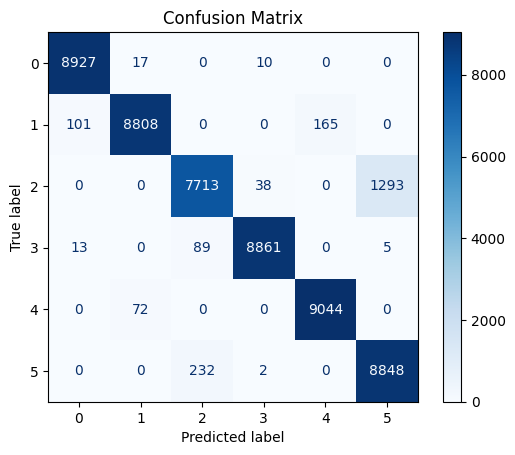

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


cm = confusion_matrix(Y_test, max_y_pred_test)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


In [42]:
y_pred_train = model_m.predict(x_train)

max_y_pred_train = np.argmax(y_pred_train, axis=1)

y_train_original = np.argmax(y_train_hot, axis=1) 

from sklearn.metrics import accuracy_score, classification_report

train_accuracy = accuracy_score(y_train_original, max_y_pred_train)
print("Train Accuracy:", train_accuracy)

print(classification_report(y_train_original, max_y_pred_train))


6743/6743 ━━━━━━━━━━━━━━━━━━━━ 49s 7ms/step
Train Accuracy: 0.9729312574450629
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     36039
           1       1.00      0.98      0.99     35926
           2       0.98      0.88      0.93     35956
           3       1.00      0.99      0.99     36032
           4       0.99      1.00      0.99     35884
           5       0.90      0.98      0.94     35910

    accuracy                           0.97    215747
   macro avg       0.97      0.97      0.97    215747
weighted avg       0.97      0.97      0.97    215747



In [43]:
print(train_accuracy)

0.9729312574450629


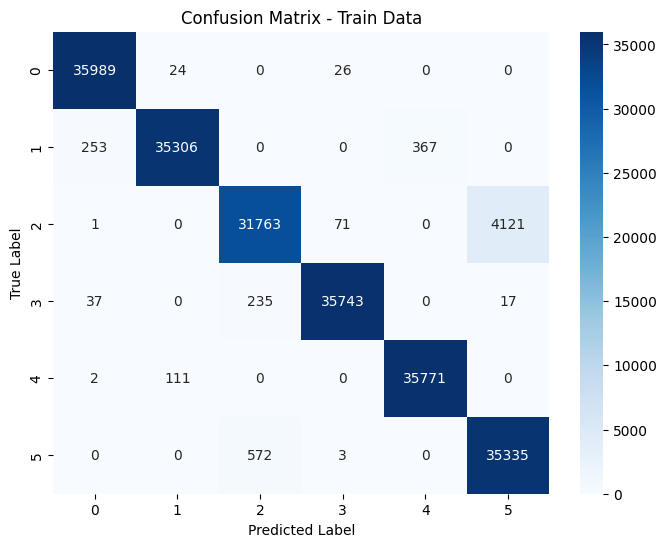

In [ ]:

cm_train = confusion_matrix(y_train_original, max_y_pred_train)

plt.figure(figsize=(8,6))
sns.heatmap(cm_train, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Train Data')
plt.show()


In [45]:
print(df_final.size)


8100000


In [46]:
print(df_final.shape)


(2700000, 3)


In [47]:
print(X_train.shape[0])
print(Y_train.shape[0])


215747
215747


In [56]:
tom = pd.read_csv(r"C:\Users\kriti\OneDrive\Desktop\final_df1.csv")
tom.head()

,label,Ch1,Ch2
0,0,0.072198,0.151170
1,0,0.760742,-0.180431
2,0,-0.539841,0.763355
3,0,0.174205,0.584801
4,0,-1.355893,0.304216


In [57]:
tom = tom.dropna(axis=1)
tom.head()

,label,Ch1,Ch2
0,0,0.072198,0.151170
1,0,0.760742,-0.180431
2,0,-0.539841,0.763355
3,0,0.174205,0.584801
4,0,-1.355893,0.304216


In [58]:
tom = tom.rename(columns={'CH1': 'Ch1', 'CH2': 'Ch2'})

print(tom.head())


   label       Ch1       Ch2
0      0  0.072198  0.151170
1      0  0.760742 -0.180431
2      0 -0.539841  0.763355
3      0  0.174205  0.584801
4      0 -1.355893  0.304216


In [59]:
tomX, tomY = create_segments_and_labels(tom, Time_periods, step_distance, 'label')

In [60]:
input_shape = (Time_periods * 2)
tomX = tomX.reshape(tomX.shape[0], input_shape)

y_pred_test = model_m.predict(tomX)

max_y_pred_test = np.argmax(y_pred_test, axis=1)

print(max_y_pred_test.shape)

print(max_y_pred_test)

tomY = tomY.astype('int')

print(tomY)


156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
(4985,)
[0 0 0 ... 5 5 5]
[0 0 0 ... 5 5 5]


In [63]:
label_mapping = {'cyl': 0, 'hook': 1, 'tip': 2, 'palm': 3, 'spher': 4, 'lat': 5}

In [64]:
inv_label_mapping = {v: k for k, v in label_mapping.items()}

accuracy = accuracy_score(tomY, max_y_pred_test)

print("Classification Report:")

print(classification_report(
    tomY, max_y_pred_test, 
    labels=list(inv_label_mapping.keys()), 
    target_names=[inv_label_mapping[i] for i in inv_label_mapping.keys()]
))

print("Accuracy:", accuracy)

print("Confusion Matrix:")
cm_train = confusion_matrix(tomY, max_y_pred_test)
print(cm_train)

Classification Report:
              precision    recall  f1-score   support

         cyl       0.89      0.81      0.85       826
        hook       0.81      0.81      0.81       834
         tip       0.96      0.53      0.68       833
        palm       0.93      0.92      0.93       833
       spher       0.83      0.80      0.81       834
         lat       0.63      1.00      0.77       825

    accuracy                           0.81      4985
   macro avg       0.84      0.81      0.81      4985
weighted avg       0.84      0.81      0.81      4985

Accuracy: 0.8118355065195587
Confusion Matrix:
[[673 153   0   0   0   0]
 [ 17 679   0   0 138   0]
 [  5   0 441  54   0 333]
 [ 62   4   0 766   1   0]
 [  0   3  13   3 667 148]
 [  0   0   4   0   0 821]]


In [65]:
accuracy

0.8118355065195587

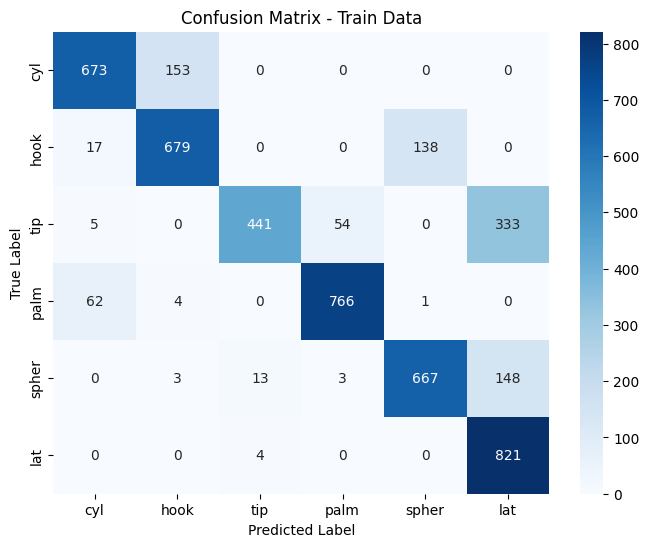

In [ ]:

plt.figure(figsize=(8,6))
sns.heatmap(
    cm_train, 
    annot=True, 
    fmt="d", 
    cmap="Blues",
    xticklabels=[inv_label_mapping[i] for i in range(len(inv_label_mapping))],
    yticklabels=[inv_label_mapping[i] for i in range(len(inv_label_mapping))]
)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Train Data')
plt.show()